# Assignment 1

## Question 3 (Linear Regression)

This assignment will have you working and experimenting with linear regression. The general multiple linear regression model, given $p$ predictors, is defined as: $$Y=\beta_0+\beta_1X_1+\beta_2X_2+...+\beta_pX_p+\epsilon,$$ where $Y$ is the response variable, $X_j$ is the $j$<sup>th</sup> predictor and $\beta_j$ quantifies the association between the response and the variable. A good way to think about $\beta_j$ is as the average effect on $Y$ of a one unit increase in $X_j$, holding all other predictors fixed. The $\epsilon$ term is the error term, which is independent of $X$ and has mean zero (the expected value of $Y$ when all variables are set to zero).

Work with Numpy only and do not use library functions that directly perform model fitting like `np.polyfit`. However, you may use library functions to compare your results while experimenting. This assignment becomes much easier to complete if accompanied by reading the third chapter in An Introduction to Statistical Learning. The text is freely available for download on the internet at [statlearning.com](statlearning.com)

Reference: James, G., Witten, D., Hastie, T., Tibshirani, R., Taylor, J. (2023). Linear Regression. In: An Introduction to Statistical Learning. Springer Texts in Statistics. Springer, Cham. https://doi.org/10.1007/978-3-031-38747-0_3

### Imports

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler
# other imports if necessary

### Part 1: Simple Regression

In this part, the function `gen_data()` samples hundred data points from a random 25 degree single-variable polynomial. This data is stored in the `predictor` and `response` variables. Your task is to experiment with linear regression on this dataset. Specifically:

1. Fit a line to the curve $(y=\beta_1x+\beta_0)$
2. Fit a polynomial to the curve $(y=\sum_{0}^{k}\beta_kx^k)$ and choose $k$ that satisfactorily minimizes error.
    - Note that the original polynomial is a 25 degree polynomial and we might not need exactly that many.
    - Check how well the coefficients match when we try to fit a 25 degree polynomial to the data. Get the coefficients from the `gen_data()` function.
3. Perform L1 and L2 regularization on the curve obtained from step 2.

Report error metrics for all experiments in tabular form (or any other way that helps us compare and choose between the different methods)



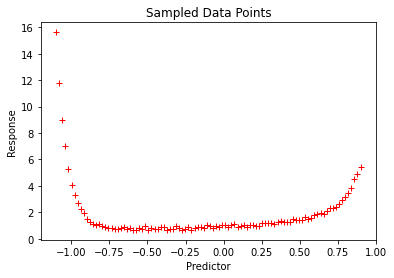

In [61]:
def gen_data():
    coeff = np.random.rand(26)
    x = np.linspace(-1.1, 0.9, 100)
    y = np.zeros_like(x)
    for i, c in enumerate(coeff):
        y += c * x**i
    y += np.random.randn(100) * 0.1

    return x, y, coeff

predictor, response, coeff = gen_data()

plt.plot(predictor, response, 'r+')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Sampled Data Points')
plt.show()

In [62]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, max_iter=2000, tol=1e-4, regularizer="None", alpha=1):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.tol = tol
        self.alpha = alpha
        self.regularizer = regularizer

    def fit(self, X, y):
        m, n = X.shape
        X = np.column_stack((np.ones((m, 1)), X))
        y = y.reshape(-1, 1)
        m, n = X.shape

        self.beta = np.zeros((n, 1))

        def regularization_term(beta): 
            reg_func = {
                "None": np.zeros((n, 1)),
                "L1": np.sign(beta) * float(self.alpha),
                "L2": beta * float(self.alpha)
            }
            return reg_func[self.regularizer]

        for _ in range(self.max_iter):
            gradient = -2/m * (X.T @ (y - (X @ self.beta))) + \
                regularization_term(self.beta)
            self.beta -= self.learning_rate * \
                gradient 
            if np.linalg.norm(gradient) < self.tol:
                break

    def predict(self, X):
        m, n = X.shape
        X = np.column_stack((np.ones((m,1)), X))
        return X @ self.beta
    
    def get_params(self):
        return self.beta

    def mse(self, pred, real):
        def regularization_term(beta):
            reg_func = {
                "None": 0,
                "L1": np.mean(np.abs(beta)),
                "L2": np.mean(beta**2)
            }
            return reg_func[self.regularizer]
        return np.mean((pred.flatten() - real.flatten())**2) + self.alpha * regularization_term(self.beta)
    
    def mae(self, pred, real):
        return np.mean(np.abs(pred.flatten() - real.flatten()))

MAE:  1.308222748560374
MSE:  4.75334284597269


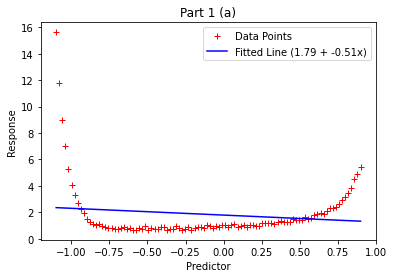

In [63]:

model = LinearRegression()
model.fit(predictor.reshape(-1,1), response)
line_params = model.get_params()

pred = model.predict(predictor.reshape(-1,1))
y_points = pred

print("MAE: ", model.mae(pred, response))
print("MSE: ", model.mse(pred, response))

plt.plot(predictor, response, 'r+')
plt.plot(predictor, pred, 'b-')  
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Part 1 (a)')
plt.legend(['Data Points', f'Fitted Line ({line_params[0][0]:.2f} + {line_params[1][0]:.2f}x)'])
plt.show()

In [64]:
class PolynomialRegression(LinearRegression):
    def __init__(self, degree, learning_rate=0.01, max_iter=1000, tol=1e-4, regularizer="None", alpha=1):
        self.degree = degree
        super().__init__(learning_rate, max_iter, tol, regularizer, alpha)

    def fit(self, X, y):
        X = np.column_stack([X**i for i in range(1, self.degree + 1)])
        super().fit(X, y)

    def predict(self, X):
        X = np.column_stack([X**i for i in range(1, self.degree + 1)])
        return super().predict(X)
    

MAE (degree= 1) :  1.266900197906267
MSE (degree= 1) :  4.753342867009216


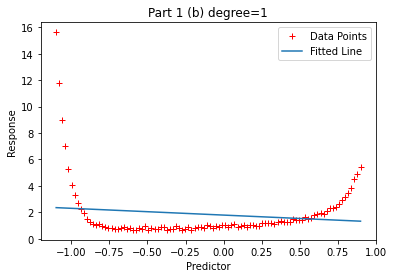

MAE (degree= 2) :  1.601425707492487
MSE (degree= 2) :  2.468303018048388


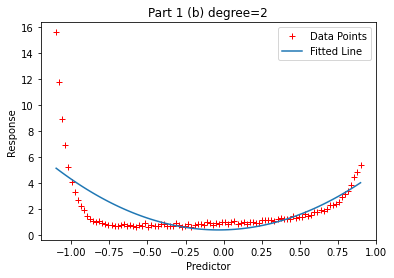

MAE (degree= 3) :  1.6225881337628925
MSE (degree= 3) :  2.12291311539264


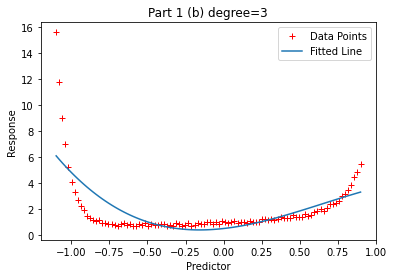

MAE (degree= 4) :  1.7447693613668176
MSE (degree= 4) :  1.5045188206653197


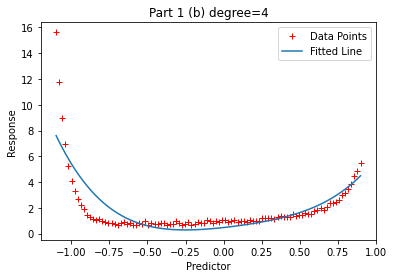

MAE (degree= 5) :  1.7644498604204528
MSE (degree= 5) :  1.2649829655589058


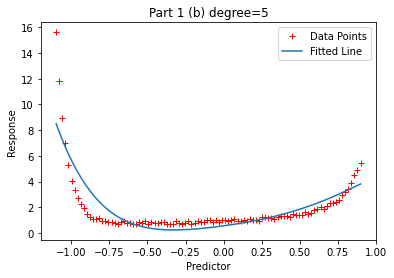

MAE (degree= 6) :  1.777919417658999
MSE (degree= 6) :  0.8771138660949095


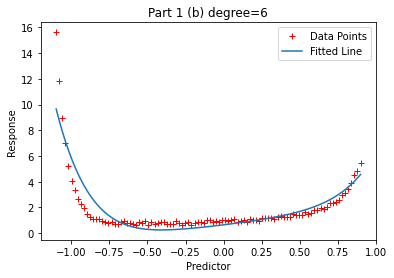

MAE (degree= 7) :  1.7818495908634424
MSE (degree= 7) :  0.7307425132415265


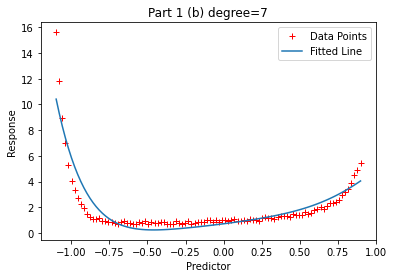

MAE (degree= 8) :  1.7661379405077917
MSE (degree= 8) :  0.4903467686613752


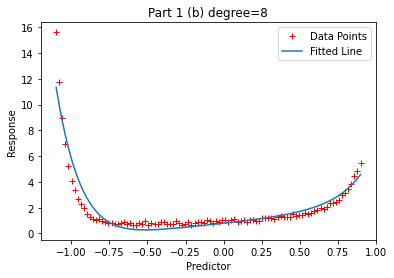

MAE (degree= 9) :  1.7577556283805993
MSE (degree= 9) :  0.40335285458652903


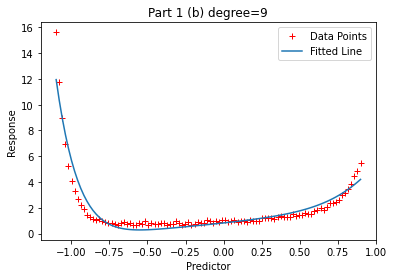

MAE (degree= 10) :  1.7340197819316818
MSE (degree= 10) :  0.2628813216179655


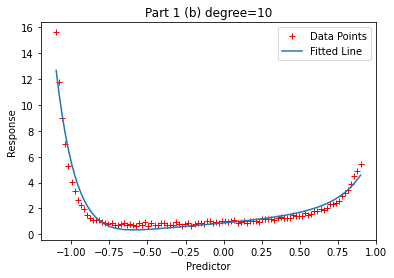

MAE (degree= 11) :  1.72009352741534
MSE (degree= 11) :  0.21367362047763094


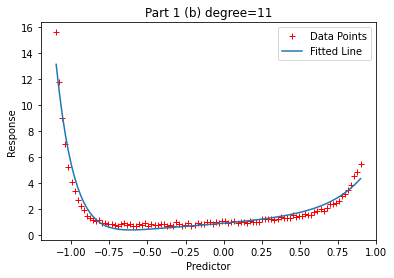

MAE (degree= 12) :  1.696109804251754
MSE (degree= 12) :  0.13650709637363


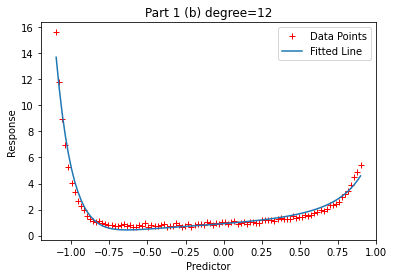

MAE (degree= 13) :  1.6816665349109352
MSE (degree= 13) :  0.11100022263451959


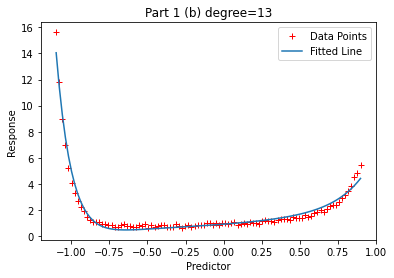

MAE (degree= 14) :  1.6613935098018862
MSE (degree= 14) :  0.07157327315600398


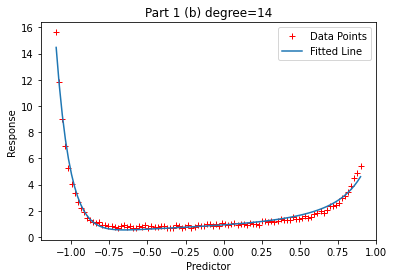

MAE (degree= 15) :  1.6497229353360268
MSE (degree= 15) :  0.0601053028317571


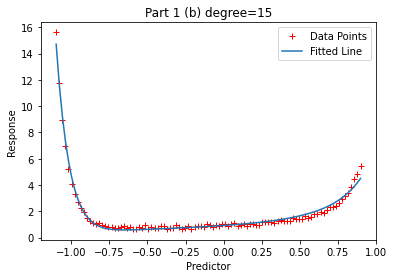

MAE (degree= 16) :  1.6351755583693723
MSE (degree= 16) :  0.041830439284149784


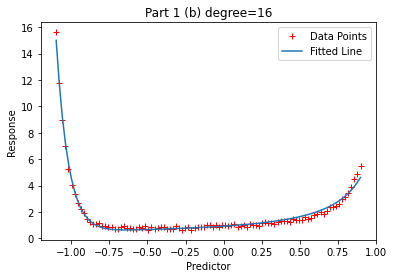

MAE (degree= 17) :  1.628026815891627
MSE (degree= 17) :  0.03788321914677826


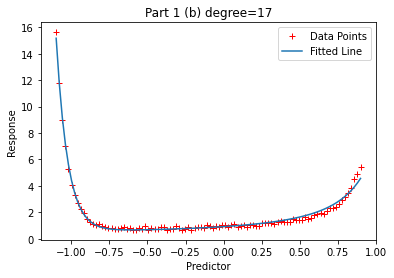

MAE (degree= 18) :  1.6199623239645122
MSE (degree= 18) :  0.03058889466870628


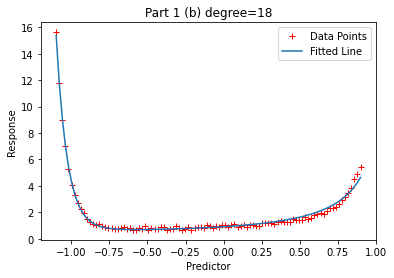

MAE (degree= 19) :  1.6171744068981486
MSE (degree= 19) :  0.030050948920461503


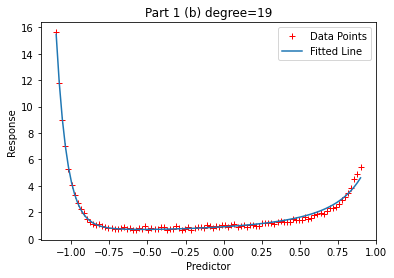

MAE (degree= 20) :  1.6139925622171492
MSE (degree= 20) :  0.027857012457861825


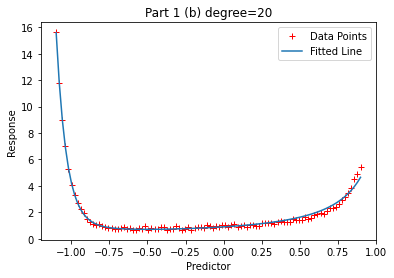

MAE (degree= 21) :  1.6139047010789724
MSE (degree= 21) :  0.02840405387132948


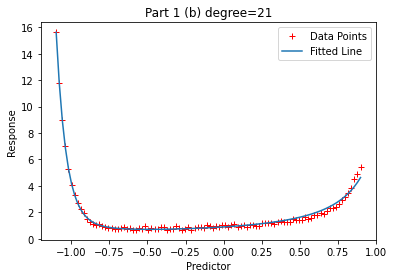

MAE (degree= 22) :  1.6135138082452183
MSE (degree= 22) :  0.028169392641746813


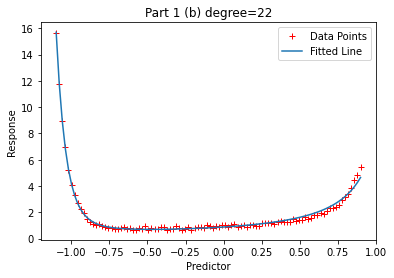

MAE (degree= 23) :  1.6145654864163197
MSE (degree= 23) :  0.0287023872940242


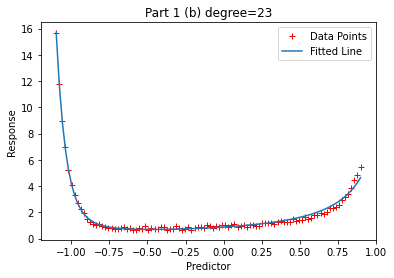

MAE (degree= 24) :  1.6152895720151437
MSE (degree= 24) :  0.028944957864588422


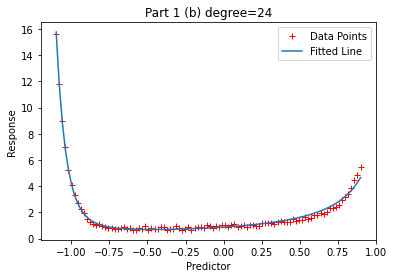

Coefficients:  [ 0.8807067   0.74691824  0.87925714  0.59264342  0.75526318  0.40578799
  0.63471666  0.25574781  0.53671479  0.14306138  0.45961198  0.06042635
  0.39862261  0.00115599  0.34902439 -0.03962788  0.30671641 -0.06514397
  0.26816443 -0.07727303  0.23021315 -0.0768178   0.18988734 -0.06367219
  0.14420716 -0.03691149]
True Coefficients:  [0.94606575 0.60169232 0.38713268 0.15041477 0.78631798 0.99451772
 0.94431085 0.41701882 0.61945417 0.10379848 0.74592398 0.58423509
 0.87107895 0.24293539 0.60303086 0.79656031 0.84231301 0.03544573
 0.75547008 0.04029257 0.95991794 0.57425573 0.1881876  0.35184927
 0.77305952 0.31043315]
MAE fo coeff:  0.34566904997929737
MAE (degree= 25) :  1.6164157167389928
MSE (degree= 25) :  0.029113401310271916


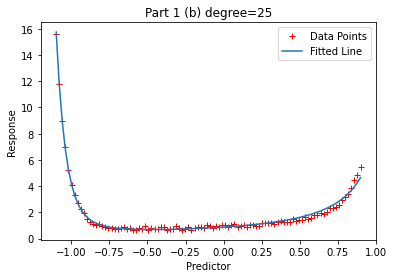

Text(0, 0.5, 'MSE')

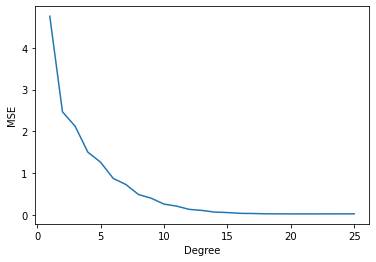

In [65]:
x = range(1, 26)
y = []
for i in range(1, 26):
    model = PolynomialRegression(degree=i)
    model.fit(predictor, response)
    pred = model.predict(predictor)

    coeff = np.array(coeff)
    reg_coeff = model.get_params()
    reg_coeff = reg_coeff.flatten()

    if i == 25:
        print("Coefficients: ", reg_coeff)
        print("True Coefficients: ", coeff)

        print("MAE fo coeff: ", np.mean(np.abs(coeff - reg_coeff)))

    mae = np.mean(np.abs(response - pred))
    mse = model.mse(pred, response)

    print(f"MAE (degree= {i}) : ", mae)
    print(f"MSE (degree= {i}) : ", mse)

    y.append(mse)

    plt.plot(predictor, response, 'r+')
    plt.plot(predictor, pred)
    plt.xlabel('Predictor')
    plt.ylabel('Response')
    plt.title(f'Part 1 (b) degree={i}')
    plt.legend(['Data Points', 'Fitted Line'])
    plt.show()

plt.plot(x, y)
plt.xlabel('Degree')
plt.ylabel('MSE')

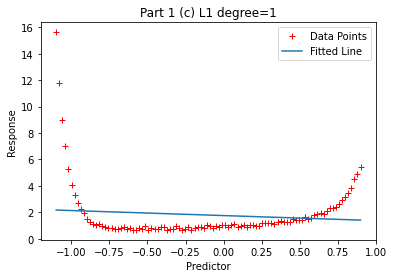

MSE (L1):  4.868333362679789


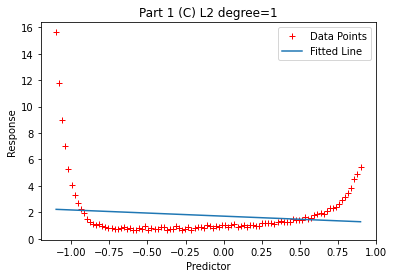

MSE (L2):  4.917747140787519


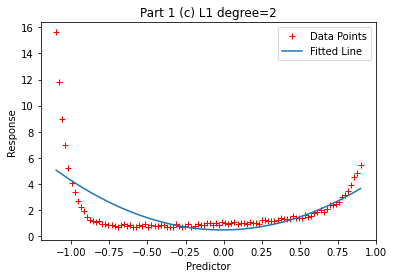

MSE (L1):  2.68795240915902


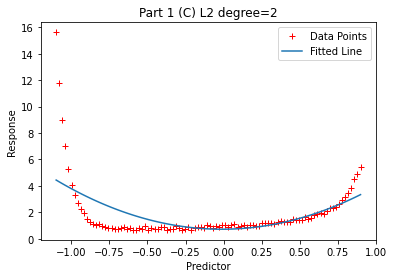

MSE (L2):  3.0786461871735744


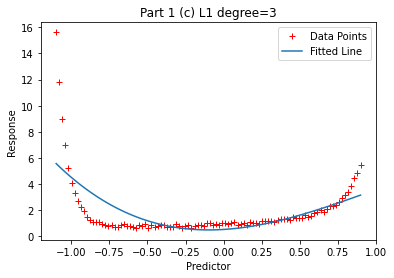

MSE (L1):  2.464438650405322


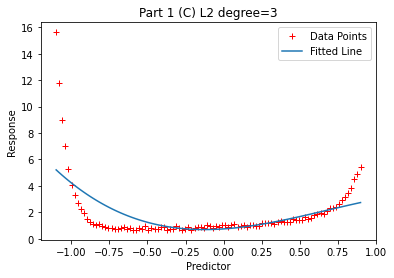

MSE (L2):  2.718651814246967


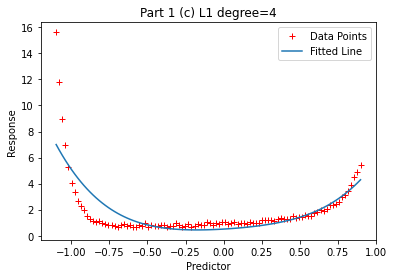

MSE (L1):  1.7622374739969537


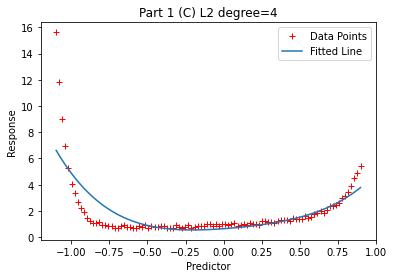

MSE (L2):  1.9539649555800074


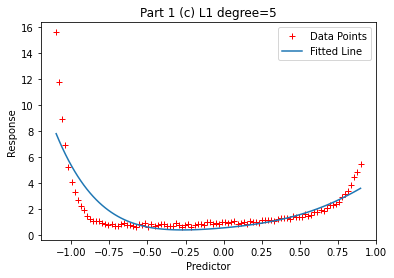

MSE (L1):  1.5114857988855557


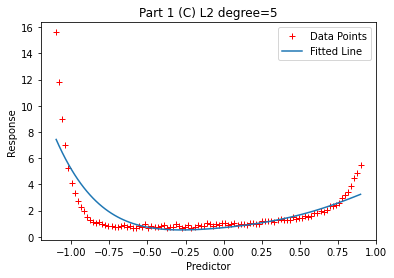

MSE (L2):  1.6786781078362114


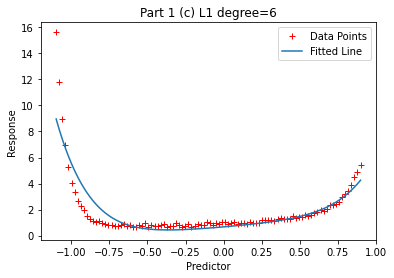

MSE (L1):  1.0756651666903463


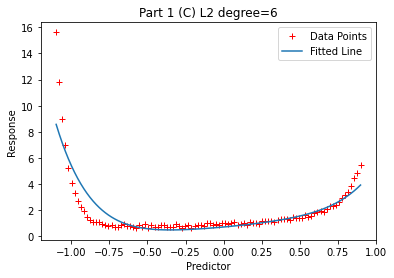

MSE (L2):  1.2182377432040568


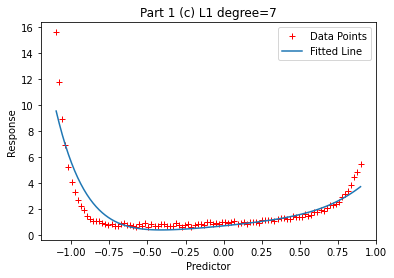

MSE (L1):  0.936886458757643


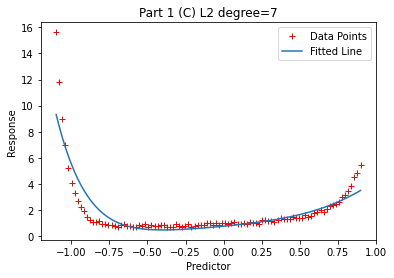

MSE (L2):  1.0298415315675729


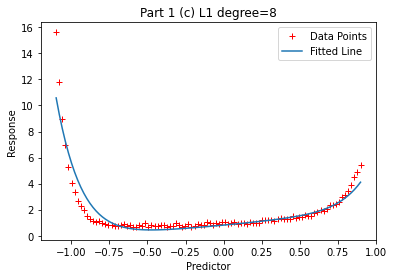

MSE (L1):  0.6618963704264362


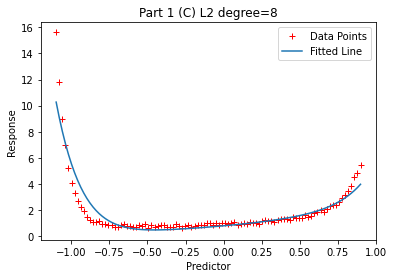

MSE (L2):  0.740189151959981


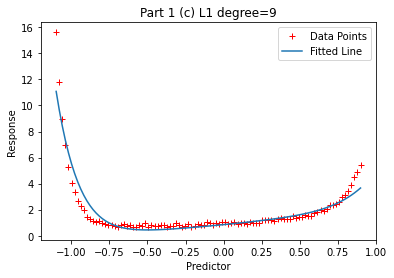

MSE (L1):  0.5902255709436461


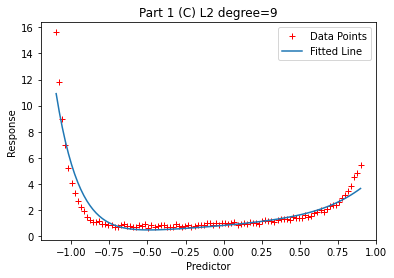

MSE (L2):  0.6185659599538693


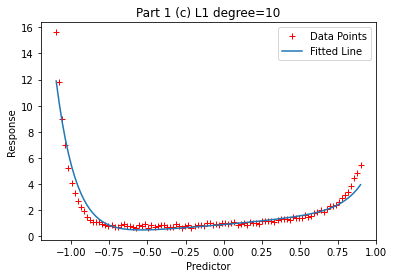

MSE (L1):  0.420570092560346


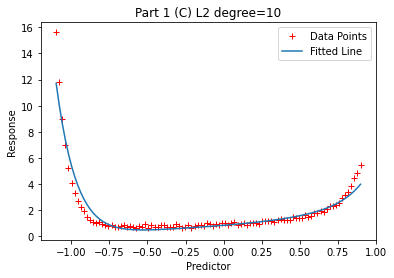

MSE (L2):  0.4407176612429846


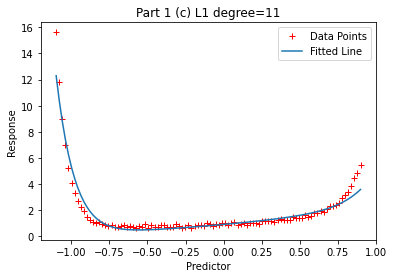

MSE (L1):  0.383833006253353


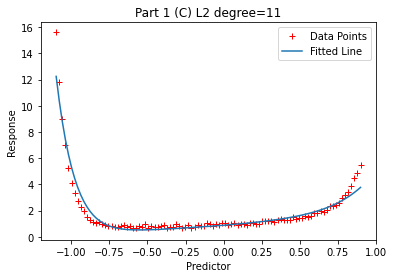

MSE (L2):  0.36665842707688856


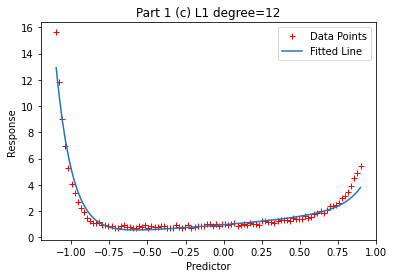

MSE (L1):  0.2862759597377861


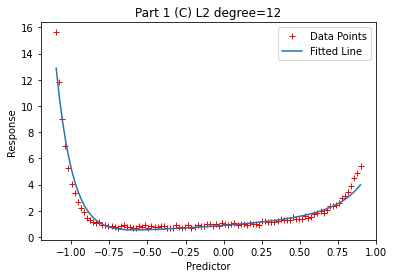

MSE (L2):  0.26218905483475097


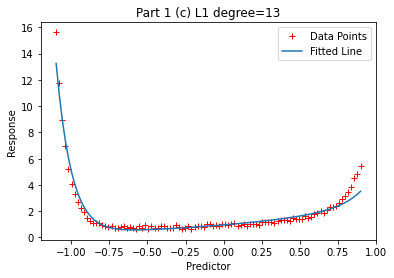

MSE (L1):  0.2715877620724305


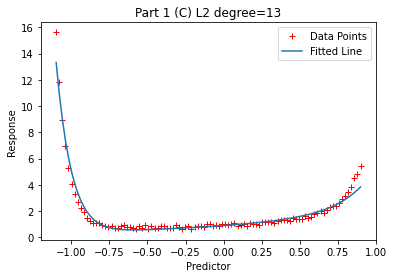

MSE (L2):  0.22025710230069176


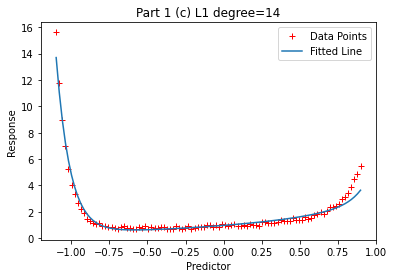

MSE (L1):  0.21738775118365253


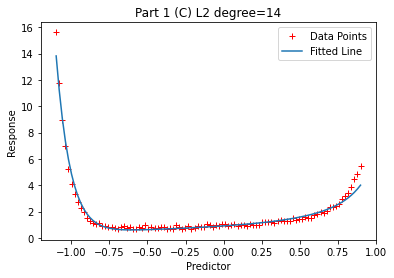

MSE (L2):  0.1623577058869619


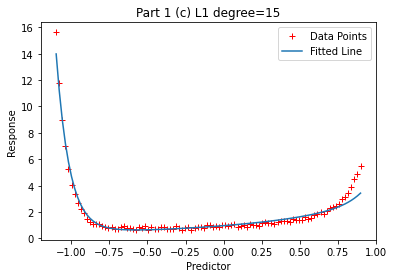

MSE (L1):  0.21228794978320675


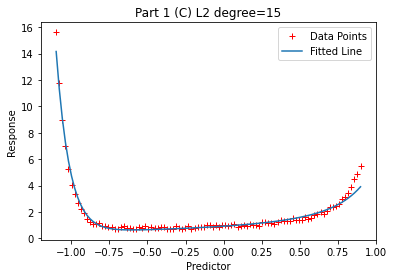

MSE (L2):  0.14082352886844196


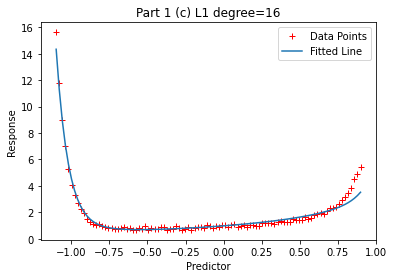

MSE (L1):  0.18310639188530126


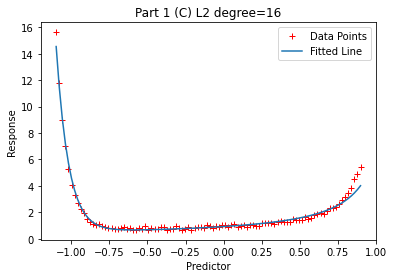

MSE (L2):  0.11107442475198807


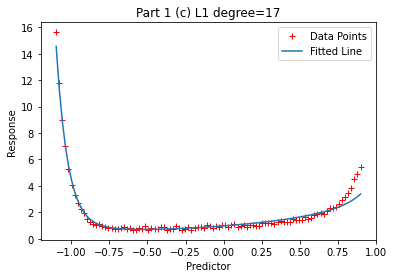

MSE (L1):  0.18211779422060786


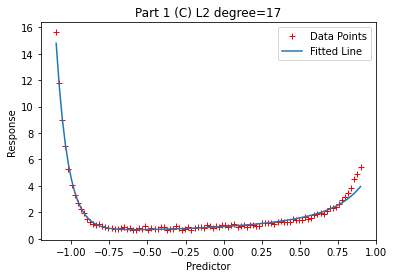

MSE (L2):  0.1014850286659471


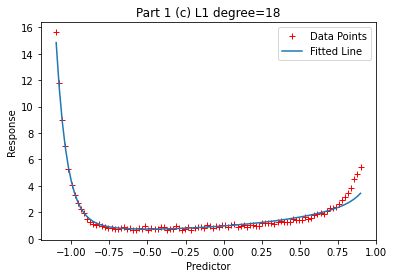

MSE (L1):  0.1674210020092109


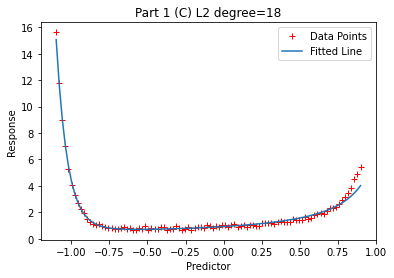

MSE (L2):  0.08769473651266033


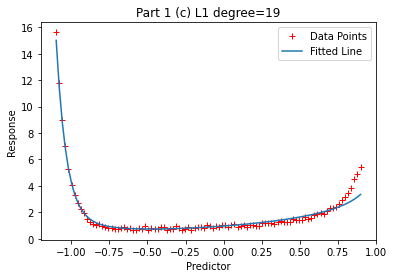

MSE (L1):  0.16821559682697376


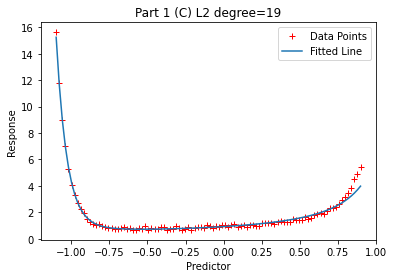

MSE (L2):  0.08434048153503937


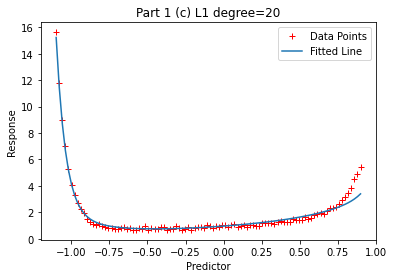

MSE (L1):  0.16159883572797393


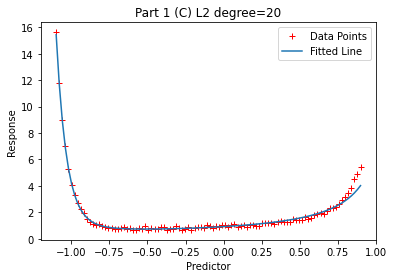

MSE (L2):  0.07882943541859237


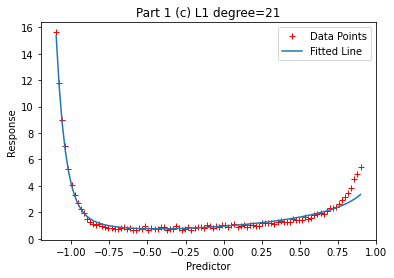

MSE (L1):  0.16324526811092246


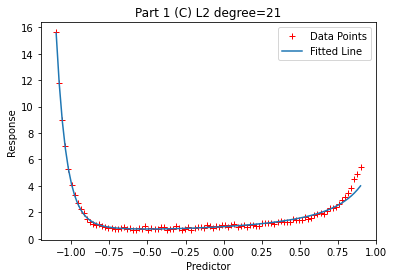

MSE (L2):  0.0781629733989476


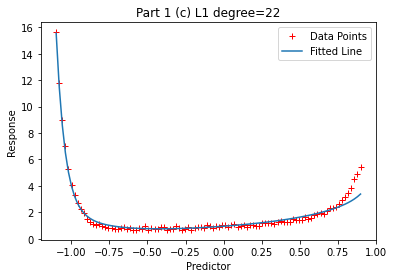

MSE (L1):  0.1608565054106939


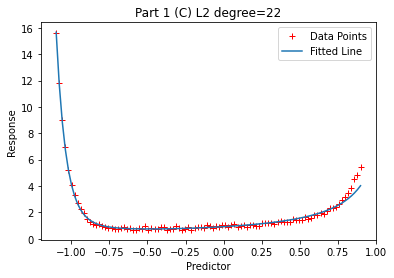

MSE (L2):  0.0764020875270881


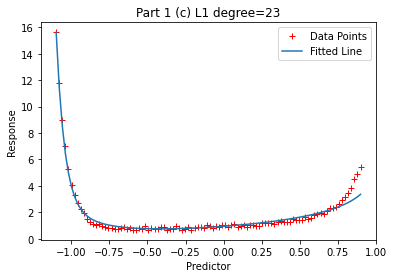

MSE (L1):  0.16250376976580977


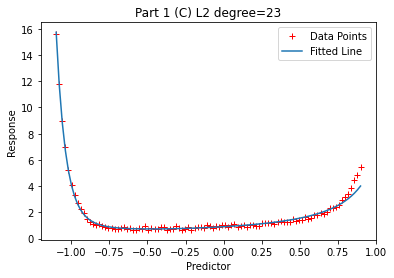

MSE (L2):  0.07646642477904256


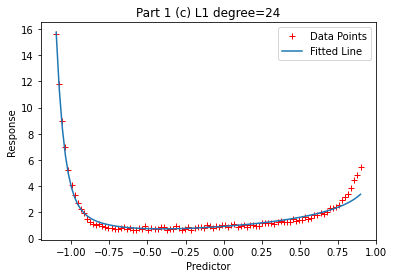

MSE (L1):  0.1625046515151722


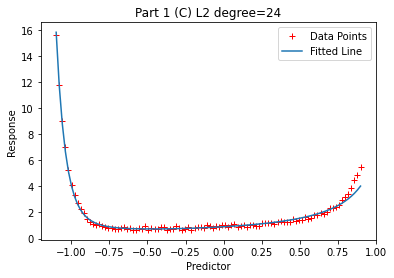

MSE (L2):  0.07602769171330294


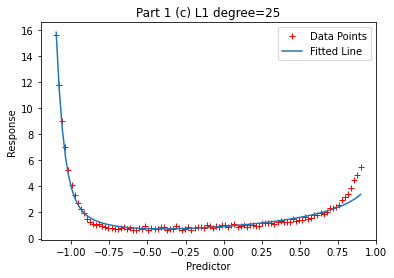

MSE (L1):  0.16380412679226483


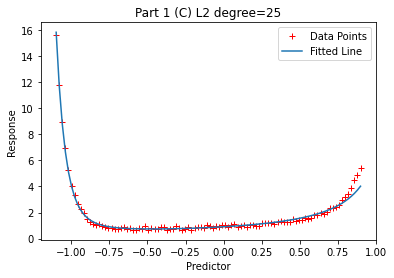

MSE (L2):  0.07594195621714978


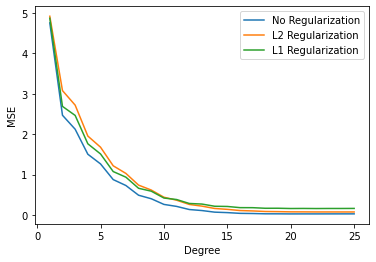

In [66]:
l1_x = range(1, 26)
l1_y = []
l2_x = range(1, 26)
l2_y = []

for i in range(1, 26):
    model_l1 = PolynomialRegression(degree=i, regularizer="L1", alpha=0.1)
    model_l2 = PolynomialRegression(degree=i, regularizer="L2", alpha=0.1)
    model_l1.fit(predictor, response)
    pred = model_l1.predict(predictor)

    plt.plot(predictor, response, 'r+')
    plt.plot(predictor, pred)
    plt.xlabel('Predictor')
    plt.ylabel('Response')
    plt.title(f'Part 1 (c) L1 degree={i}')
    plt.legend(['Data Points', 'Fitted Line'])
    plt.show()

    mse = model_l1.mse(pred, response)
    print("MSE (L1): ", mse)
    l1_y.append(mse)


    model_l2.fit(predictor, response)
    pred = model_l2.predict(predictor)


    plt.plot(predictor, response, 'r+')
    plt.plot(predictor, pred)
    plt.xlabel('Predictor')
    plt.ylabel('Response')
    plt.title(f'Part 1 (C) L2 degree={i}')
    plt.legend(['Data Points', 'Fitted Line'])
    plt.show()

    mse = model_l2.mse(pred, response)
    print("MSE (L2): ", mse)
    l2_y.append(mse)

plt.plot(x, y, label="No Regularization")

plt.plot(l2_x, l2_y, label="L2 Regularization")
plt.plot(l1_x, l1_y, label="L1 Regularization")
plt.xlabel('Degree')
plt.ylabel('MSE')
plt.legend()

plt.show()

### Part 2: Credit Data

In this part, we work with the credit.csv file that predicts `Balance` after looking at predictors like `Income`, `Age`, `Limit`, etc. Your task is to understand the relationship between the predictors and response using linear regression techniques. Specifically:

1. Perform multiple linear regression on the dataset. $(Y=\sum\beta_iX_i+\epsilon)$
2. Test whether all the variables are needed to predict `Balance` or if any of them can be discarded.
3. Test for [interaction effects](https://en.wikipedia.org/wiki/Interaction_(statistics)#In_regression) between `Rating` and `Age`.

As before, perform the above experiments by obtaining and reporting error metrics for all experiments.

In [67]:
credit = pd.read_csv('credit.csv')

balance_column = credit['Balance']

scaler = StandardScaler()
credit = pd.DataFrame(scaler.fit_transform(
    credit.drop('Balance', axis=1)), columns=credit.columns[:-1])

credit['Balance'] = balance_column

print("Standardized Data:")
print(credit.head())
X = credit.drop(['Balance'], axis=1).values
y = credit['Balance'].values
y = y.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)


print("\nMSE (MultiLinear Regression): ", model.mse(pred, y_test))  
print("\nAbsolute Error (MultiLinear Regression): ", model.mae(pred, y_test))

Standardized Data:
     Income     Limit    Rating     Cards       Age  Education  Balance
0 -0.861583 -0.489999 -0.465539 -0.699130 -1.257674  -0.784930      333
1  1.727437  0.828261  0.828703  0.031032  1.528451   0.496588      903
2  1.686756  1.014787  1.029311  0.761194  0.889964  -0.784930      580
3  2.946152  2.068440  2.110003  0.031032 -1.141586  -0.784930      964
4  0.302928  0.070012  0.013331 -0.699130  0.715831   0.816968      331

MSE (MultiLinear Regression):  29511.426219771012

Absolute Error (MultiLinear Regression):  128.96054889355676


To test whether all the variables are needed, we can do feature selection using L1 regularization to find which feature coefficients are zero. If the coefficient is zero, then the feature is not needed.

In [68]:
print("\nMSE: ", model.mse(pred, y_test))

print("\nUsing L1 Regularization")

model = LinearRegression(regularizer="L1", alpha=1)
model.fit(X_train, y_train)
pred = model.predict(X_test)

print("\nMSE (L1): ", model.mse(pred, y_test))
print("\nAbsolute Error (L1): ", model.mae(pred, y_test))

feature = credit.columns.drop(['Balance'])
feature = feature.insert(0, 1)

coeffs_df = pd.DataFrame(
    {'feature': feature, 'coeff': model.get_params().flatten()})
 

print("\n",coeffs_df)

print("\nIt can be seen above that Education, Age and Cards have very low coefficients and can be dropped")

X_train_drop = X_train[:, :-3]
X_test_drop = X_test[:, :-3]


model = LinearRegression()
model.fit(X_train_drop, y_train)
pred_drop = model.predict(X_test_drop)
print("\nMSE (after dropping last 3 features): ", model.mse(pred_drop, y_test))

print("\nIf we drop Income and Limit features which have high coeffs, the MSE increases")

X_train_drop = X_train[:, 3:]
X_test_drop = X_test[:, 3:]

model = LinearRegression()
model.fit(X_train_drop, y_train)
pred_drop = model.predict(X_test_drop)
print("\nMSE (after dropping first 3 features): ",
      model.mse(pred_drop, y_test))


MSE:  29511.426219771012

Using L1 Regularization

MSE (L1):  29772.740511842887

Absolute Error (L1):  128.82054664285408

      feature       coeff
0          1  521.896157
1     Income -254.682887
2      Limit  307.012384
3     Rating  290.955033
4      Cards   19.327893
5        Age  -15.318177
6  Education    6.540632

It can be seen above that Education, Age and Cards have very low coefficients and can be dropped

MSE (after dropping last 3 features):  29471.589649901474

If we drop Income and Limit features which have high coeffs, the MSE increases

MSE (after dropping first 3 features):  170060.81636380492


To test interaction effect between Age and Rating, we can add a new feature to the dataset which is the product of Age and Rating. Then we can perform linear regression on the new dataset and check if the coefficient of the new feature is significant or not. If the coefficient is ~zero, then there is no interaction effect between Age and Rating.

In [69]:
interaction_credit = credit.copy()
interaction_credit['Age*Rating'] = interaction_credit['Age'] * \
    interaction_credit['Rating']
print(interaction_credit.head())
X = interaction_credit.drop(['Balance'], axis=1).values
y = interaction_credit['Balance'].values
y = y.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


model = LinearRegression(regularizer="L1", alpha=1)
model.fit(X_train, y_train)
pred = model.predict(X_test)

feature = interaction_credit.columns.drop(['Balance'])
feature = feature.insert(0, 1)

coeffs_df = pd.DataFrame(
    {'feature': feature, 'coeff': model.get_params().flatten()})

print("\nMSE (L1): ", np.mean((pred - y_test)**2))

print("\n", coeffs_df)


     Income     Limit    Rating     Cards       Age  Education  Balance  \
0 -0.861583 -0.489999 -0.465539 -0.699130 -1.257674  -0.784930      333   
1  1.727437  0.828261  0.828703  0.031032  1.528451   0.496588      903   
2  1.686756  1.014787  1.029311  0.761194  0.889964  -0.784930      580   
3  2.946152  2.068440  2.110003  0.031032 -1.141586  -0.784930      964   
4  0.302928  0.070012  0.013331 -0.699130  0.715831   0.816968      331   

   Age*Rating  
0    0.585496  
1    1.266632  
2    0.916049  
3   -2.408749  
4    0.009543  

MSE (L1):  29570.254112212955

       feature       coeff
0           1  521.897279
1      Income -254.680743
2       Limit  307.074774
3      Rating  290.892914
4       Cards   19.330110
5         Age  -15.317846
6   Education    6.540436
7  Age*Rating   -0.008384


It can be seen that the interaction effect is not significant. This is because the coefficient of the new feature is -0.008384
 which is very less compared to other features. This means that the new feature is not needed and hence there is no interaction effect between Age and Rating.

### Part 3: Shark Attacks

This is a fun dataset that aims to predict the number of shark attacks (`SharkAttacks`) using variables like `Year`, `Month`, `Temperature`, and `IceCreamSales`. This dataset has been used in popular media to show how correlation does not imply causation. Test whether predictions made with ice cream sales data are any better/worse than predictions made by neglecting ice cream sales data.

This sort of analysis reminds us that it is important to look at the data before using it for learning representations.

Correlation Matrix:
                       Year         Month  SharkAttacks  Temperature  \
Year           1.000000e+00  1.769175e-14     -0.033364     0.010930   
Month          1.769175e-14  1.000000e+00      0.275968     0.270830   
SharkAttacks  -3.336426e-02  2.759680e-01      1.000000     0.716966   
Temperature    1.092955e-02  2.708299e-01      0.716966     1.000000   
IceCreamSales  1.340168e-02 -2.611451e-01      0.534358     0.595769   

               IceCreamSales  
Year                0.013402  
Month              -0.261145  
SharkAttacks        0.534358  
Temperature         0.595769  
IceCreamSales       1.000000  
   Year     Month  Temperature  IceCreamSales  SharkAttacks
0  -1.5 -1.593255    -1.704060      -0.913101            25
1  -1.5 -1.303572    -0.880733      -0.687953            28
2  -1.5 -1.013890    -0.381747       0.212640            32
3  -1.5 -0.724207    -0.057406       0.512838            35
4  -1.5 -0.434524     0.167138       1.113233            38
A

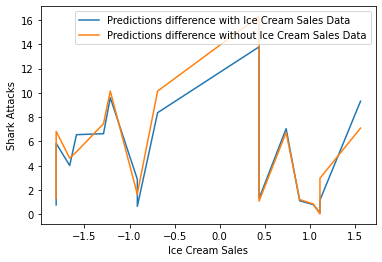

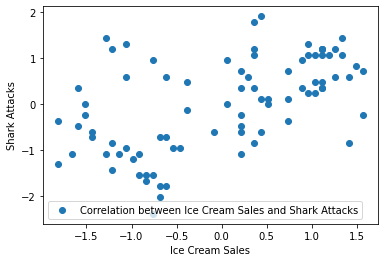

In [70]:
sharks = pd.read_csv('shark_attacks.csv')

shart_attacks_column = sharks['SharkAttacks']

correlation_matrix = sharks.corr()

print("Correlation Matrix:")
print(correlation_matrix)

scaler = StandardScaler()
sharks = pd.DataFrame(scaler.fit_transform(
    sharks.drop('SharkAttacks', axis=1)), columns=sharks.columns.delete(2))
sharks['SharkAttacks'] = shart_attacks_column


print(sharks.head())

X = sharks[['Year', 'Month', 'Temperature', 'IceCreamSales']]
y = sharks['SharkAttacks'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

model_with_ice_cream = LinearRegression()
model_with_ice_cream.fit(X_train, y_train)
y_pred_with_ice_cream = model_with_ice_cream.predict(X_test)

mse_with_ice_cream = model_with_ice_cream.mae(y_pred_with_ice_cream, y_test)
print(
    f'Absolute Error Error (with ice cream sales data): {mse_with_ice_cream}')


model_without_ice_cream = LinearRegression()
model_without_ice_cream.fit(X_train[['Year', 'Month', 'Temperature']], y_train)
y_pred_without_ice_cream = model_without_ice_cream.predict(
    X_test[['Year', 'Month', 'Temperature']])

mse_without_ice_cream = model_without_ice_cream.mae(
    y_pred_without_ice_cream, y_test
)

print(
    f'Absolute Error (without ice cream sales data): {mse_without_ice_cream}')

sorted_indices = np.argsort(X_test['IceCreamSales'])

sorted_y_test = y_test[sorted_indices]
sorted_X_test = X_test.iloc[sorted_indices]

plt.plot(sorted_X_test['IceCreamSales'], np.abs(sorted_y_test-y_pred_with_ice_cream[sorted_indices]),
            label='Predictions difference with Ice Cream Sales Data')
plt.plot(sorted_X_test['IceCreamSales'], np.abs(sorted_y_test-y_pred_without_ice_cream[sorted_indices]),
         label='Predictions difference without Ice Cream Sales Data')
plt.xlabel('Ice Cream Sales')
plt.ylabel('Shark Attacks')
plt.legend()
plt.show()

scaler = StandardScaler()
sharks = pd.DataFrame(scaler.fit_transform(
    sharks.drop('SharkAttacks', axis=1)), columns=sharks.columns.delete(2))

SharkAttacks = y.reshape(-1, 1).tolist()
SharkAttacks = scaler.fit_transform(SharkAttacks)
x = [i for i in range(0, len(SharkAttacks))]
plt.scatter(X['IceCreamSales'], SharkAttacks, label='Correlation between Ice Cream Sales and Shark Attacks')
plt.xlabel('Ice Cream Sales')
plt.ylabel('Shark Attacks')
plt.legend()
plt.show()

As seen above though icecream sales and shark attacks are correlated, it does not imply causation. Though correlation matrix states 0.53, predicting shark attacks with and without icecream sales data gives almost the same results.

In [71]:
# your code here